In [1]:
import os
import re
import numpy as np
import pandas as pd
from scipy.spatial import Delaunay

In [2]:
# (X[i], Y[i]) are coordinates of i'th point.
# n is the number of points
def polygonArea(X,Y, n) :

    # Initialize area
    area = 0.0

    # Calculate value of Shoelace formula
    j = n - 1
    for i in range( 0, n) :
        area = area + (X[j] + X[i]) * (Y[j] - Y[i])
        j = i # j is previous vertex to i
    
    # Return absolute value
    return abs(area // 2.0)

In [92]:
BASE_DIR = os.path.join('openFace', 'processed_interpolated', '')
landmarks_regex = re.compile(r'^x_[0-9]+$|^y_[0-9]+$')

for csv in os.listdir(BASE_DIR): # for every video

    openface_df = pd.read_csv(os.path.join(BASE_DIR, csv))
    landmarks_locs = openface_df.columns[openface_df.columns.str.contains(landmarks_regex)]
    
    flag = True
    for index in openface_df.index: # for every frame
        landmarks = openface_df[landmarks_locs].iloc[index].to_numpy(dtype=float)
        landmarks_points = np.ndarray(shape=(68,2), dtype=float)
        
        for i in range(68): # for every landmarks
            landmarks_points[i,0] = landmarks[i] # x coordinates
            landmarks_points[i,1] = landmarks[68+i] # y coordinates
            
        tri = Delaunay(landmarks_points) # compute triangularization
        triangles = landmarks_points[tri.simplices]
        
        if flag:
            FREEZED_TRIANGLES_INDEXES = tri.simplices
            flag = False
        
        # compute the area of every triangle
        triangles = landmarks_points[FREEZED_TRIANGLES_INDEXES]
        for triangle in triangles:
            X_coords = triangle[:,0]
            Y_coords = triangle[:,1]
            area = polygonArea(X_coords, Y_coords, 3)
        break
        
    break

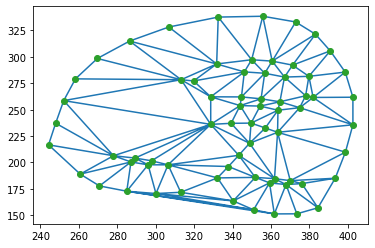

In [96]:
tri = Delaunay(landmarks_points)
import matplotlib.pyplot as plt

plt.triplot(landmarks_points[:,0], landmarks_points[:,1], tri.simplices)

plt.plot(landmarks_points[:,0], landmarks_points[:,1], 'o')

plt.show()

In [68]:
print(tri.simplices[0])

triangles = landmarks_points[tri.simplices]
for triangle in triangles:
    X = triangle[:,0]
    Y = triangle[:,1]
    area = polygonArea(X, Y, 3)
    

[26 16 25]


In [71]:
triangle = landmarks_points[tri.simplices[0]]
X_coords = triangle[:,0]
Y_coords = triangle[:,1]
area = polygonArea(X_coords, Y_coords, 3)

In [88]:
print(len(tri.simplices))

111
